# Project 2020
<br>

#### Training regression models using Keras.  The author is Owen Coleman (G00387850@gmit.ie).
***

#### Overview

In this notebook you will find the two regression models that were used in the *powerprod* web service. These models were creating and trained using machine learning. I have also included explanations and some analysis of the accuracy of each of the models. 

#### Imports
Lets first import all the required libraries and configure our display options.

In [1]:
import numpy as np
import tensorflow.keras as kr
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [14, 8]

#### Powerproduction Dataset

Let's read the dataset into a pandas dataframe and display it with matplotlib. Before we do this, we must first clean the dataset, removing a few instances where power values were recorded as zero toward the end of the dataset. 

The plot below shows our data with speed on the x axis and power on the y axis. We can see that it takes a particular amount of wind speed to activate any sort of real power generation from the turbines, from which point power generation grows dramatically with wind speed increase before levelling off at about 100KW/h.

In [2]:
df = pd.read_csv("powerproduction.csv")

In [3]:
#Remove the unreasonable power values
zeroVals = df[(df["speed"] > 10) & (df["power"] == 0)].index
df.drop(zeroVals, inplace=True)

Text(0, 0.5, 'Power Output')

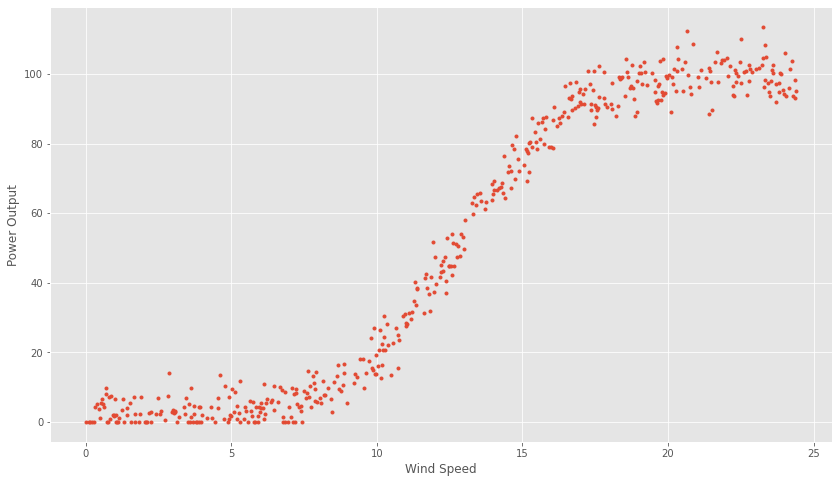

In [4]:
plt.plot(df["speed"], df["power"], '.')
# Add axis labels and a legend.
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')

In [5]:
#storing speed and power in xy numpy arrays for ease of access.
x = np.array(df["speed"])
y = np.array(df["power"])

<br>

#### Linear Regression Model

We will be writing our regression models using the Keras python library[1](https://keras.io/). Keras is an open source software library that acts as an interface for the TensorFlow library, and overall makes machine learning much easier for beginners.

Let's first try to fit our data to a linear regression model. Below we create our neural network with the keras.Sequential[2](https://keras.io/api/models/sequential/) class. This is a general-purpose class that allows us to move linearly through the layers of our network. As we are performing simple linear regression, we need only a single layer with one neuron. We are using a Dense layer for this neural network, as it is the most common and frequently used layer[3](https://www.tutorialspoint.com/keras/keras_dense_layer.htm). Within this layer we provide the number of neurons(1), the shape of our input (which is a single value x), our activation function and our *weight* and *bias* initializers. 

As we are essentially fitting a straight line to a database, we can use the following equation:

$$y = mx +c$$

In our neural network, our Dense layer with a linear activation does this computation for us, only here our *m* is our networks initial *weight* value and our *c* is the bias value. Next, we compile our model with the gradient descent method 'adam' and computing our loss as the *mean squared error*.


In [6]:
# Create our neural network with the sequential class. Code adapted from [8].
model = kr.models.Sequential()
#Add our layer with single nueron for y=wx+b calculation
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
#Compile with adam and MSE loss calculation.
model.compile('adam', loss='mean_squared_error')

In [7]:
# Train the neural network on our dataset. 1500 epochs.
history = model.fit(x, y, epochs=1500)

Epoch 1/1500
16/16 [==============================] - 0s 666us/step - loss: 2534.5319
Epoch 2/1500
16/16 [==============================] - 0s 667us/step - loss: 2652.5102
Epoch 3/1500
16/16 [==============================] - 0s 600us/step - loss: 2603.5930
Epoch 4/1500
16/16 [==============================] - 0s 533us/step - loss: 2547.6608
Epoch 5/1500
16/16 [==============================] - 0s 667us/step - loss: 2426.2068
Epoch 6/1500
16/16 [==============================] - 0s 667us/step - loss: 2421.4413
Epoch 7/1500
16/16 [==============================] - 0s 600us/step - loss: 2431.2873
Epoch 8/1500
16/16 [==============================] - 0s 600us/step - loss: 2646.9318
Epoch 9/1500
16/16 [==============================] - 0s 600us/step - loss: 2541.5898
Epoch 10/1500
16/16 [==============================] - 0s 800us/step - loss: 2269.0265
Epoch 11/1500
16/16 [==============================] - 0s 600us/step - loss: 2368.9515
Epoch 12/1500
16/16 [==============================]

16/16 [==============================] - 0s 533us/step - loss: 1094.6272
Epoch 96/1500
16/16 [==============================] - 0s 600us/step - loss: 1059.5890
Epoch 97/1500
16/16 [==============================] - 0s 533us/step - loss: 1031.7538
Epoch 98/1500
16/16 [==============================] - 0s 600us/step - loss: 1060.2782
Epoch 99/1500
16/16 [==============================] - 0s 667us/step - loss: 1066.2764
Epoch 100/1500
16/16 [==============================] - 0s 533us/step - loss: 983.7783
Epoch 101/1500
16/16 [==============================] - 0s 533us/step - loss: 1033.2449
Epoch 102/1500
16/16 [==============================] - 0s 533us/step - loss: 1002.9997
Epoch 103/1500
16/16 [==============================] - 0s 533us/step - loss: 983.0846
Epoch 104/1500
16/16 [==============================] - 0s 533us/step - loss: 968.6969
Epoch 105/1500
16/16 [==============================] - 0s 600us/step - loss: 947.8582
Epoch 106/1500
16/16 [==============================] -

16/16 [==============================] - 0s 600us/step - loss: 451.3536
Epoch 190/1500
16/16 [==============================] - 0s 533us/step - loss: 451.4236
Epoch 191/1500
16/16 [==============================] - 0s 533us/step - loss: 436.2456
Epoch 192/1500
16/16 [==============================] - 0s 533us/step - loss: 426.6347
Epoch 193/1500
16/16 [==============================] - 0s 533us/step - loss: 449.6845
Epoch 194/1500
16/16 [==============================] - 0s 600us/step - loss: 420.3993
Epoch 195/1500
16/16 [==============================] - 0s 467us/step - loss: 399.5181
Epoch 196/1500
16/16 [==============================] - 0s 533us/step - loss: 409.2554
Epoch 197/1500
16/16 [==============================] - 0s 667us/step - loss: 438.5085
Epoch 198/1500
16/16 [==============================] - 0s 533us/step - loss: 417.9972
Epoch 199/1500
16/16 [==============================] - 0s 533us/step - loss: 404.9297
Epoch 200/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 283.4858
Epoch 284/1500
16/16 [==============================] - 0s 533us/step - loss: 270.0739
Epoch 285/1500
16/16 [==============================] - 0s 533us/step - loss: 298.3041
Epoch 286/1500
16/16 [==============================] - 0s 600us/step - loss: 293.5459
Epoch 287/1500
16/16 [==============================] - 0s 533us/step - loss: 289.7296
Epoch 288/1500
16/16 [==============================] - 0s 533us/step - loss: 296.4986
Epoch 289/1500
16/16 [==============================] - 0s 533us/step - loss: 270.0623
Epoch 290/1500
16/16 [==============================] - 0s 533us/step - loss: 286.8933
Epoch 291/1500
16/16 [==============================] - 0s 600us/step - loss: 300.6384
Epoch 292/1500
16/16 [==============================] - 0s 600us/step - loss: 299.0413
Epoch 293/1500
16/16 [==============================] - 0s 533us/step - loss: 289.1707
Epoch 294/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 261.1674
Epoch 378/1500
16/16 [==============================] - 0s 533us/step - loss: 261.6705
Epoch 379/1500
16/16 [==============================] - 0s 467us/step - loss: 270.7594
Epoch 380/1500
16/16 [==============================] - 0s 466us/step - loss: 271.0934
Epoch 381/1500
16/16 [==============================] - 0s 533us/step - loss: 261.6620
Epoch 382/1500
16/16 [==============================] - 0s 533us/step - loss: 260.9095
Epoch 383/1500
16/16 [==============================] - 0s 533us/step - loss: 260.2312
Epoch 384/1500
16/16 [==============================] - 0s 533us/step - loss: 259.7078
Epoch 385/1500
16/16 [==============================] - 0s 533us/step - loss: 268.3280
Epoch 386/1500
16/16 [==============================] - 0s 533us/step - loss: 278.8821
Epoch 387/1500
16/16 [==============================] - 0s 533us/step - loss: 269.3549
Epoch 388/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 259.7221
Epoch 472/1500
16/16 [==============================] - 0s 533us/step - loss: 270.4815
Epoch 473/1500
16/16 [==============================] - 0s 467us/step - loss: 251.3269
Epoch 474/1500
16/16 [==============================] - 0s 600us/step - loss: 266.3902
Epoch 475/1500
16/16 [==============================] - 0s 533us/step - loss: 254.9025
Epoch 476/1500
16/16 [==============================] - 0s 533us/step - loss: 276.3516
Epoch 477/1500
16/16 [==============================] - 0s 533us/step - loss: 239.8784
Epoch 478/1500
16/16 [==============================] - 0s 533us/step - loss: 241.0254
Epoch 479/1500
16/16 [==============================] - 0s 600us/step - loss: 260.8552
Epoch 480/1500
16/16 [==============================] - 0s 600us/step - loss: 271.1128
Epoch 481/1500
16/16 [==============================] - 0s 533us/step - loss: 236.6148
Epoch 482/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 467us/step - loss: 243.6286
Epoch 566/1500
16/16 [==============================] - 0s 533us/step - loss: 242.0971
Epoch 567/1500
16/16 [==============================] - 0s 533us/step - loss: 250.3174
Epoch 568/1500
16/16 [==============================] - 0s 467us/step - loss: 240.2649
Epoch 569/1500
16/16 [==============================] - 0s 533us/step - loss: 250.0635
Epoch 570/1500
16/16 [==============================] - 0s 467us/step - loss: 241.3717
Epoch 571/1500
16/16 [==============================] - 0s 467us/step - loss: 225.3346
Epoch 572/1500
16/16 [==============================] - 0s 533us/step - loss: 251.7891
Epoch 573/1500
16/16 [==============================] - 0s 533us/step - loss: 263.8245
Epoch 574/1500
16/16 [==============================] - 0s 533us/step - loss: 264.2064
Epoch 575/1500
16/16 [==============================] - 0s 533us/step - loss: 231.1479
Epoch 576/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 467us/step - loss: 250.2400
Epoch 660/1500
16/16 [==============================] - 0s 600us/step - loss: 235.4491
Epoch 661/1500
16/16 [==============================] - 0s 600us/step - loss: 235.6648
Epoch 662/1500
16/16 [==============================] - 0s 533us/step - loss: 235.5836
Epoch 663/1500
16/16 [==============================] - 0s 467us/step - loss: 221.0289
Epoch 664/1500
16/16 [==============================] - 0s 533us/step - loss: 241.2499
Epoch 665/1500
16/16 [==============================] - 0s 467us/step - loss: 235.4555
Epoch 666/1500
16/16 [==============================] - 0s 533us/step - loss: 224.3155
Epoch 667/1500
16/16 [==============================] - 0s 533us/step - loss: 236.3205
Epoch 668/1500
16/16 [==============================] - 0s 533us/step - loss: 246.0971
Epoch 669/1500
16/16 [==============================] - 0s 467us/step - loss: 236.9265
Epoch 670/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 238.2253
Epoch 754/1500
16/16 [==============================] - 0s 533us/step - loss: 239.1387
Epoch 755/1500
16/16 [==============================] - 0s 467us/step - loss: 219.8015
Epoch 756/1500
16/16 [==============================] - 0s 533us/step - loss: 238.4220
Epoch 757/1500
16/16 [==============================] - 0s 600us/step - loss: 227.5781
Epoch 758/1500
16/16 [==============================] - 0s 600us/step - loss: 228.9577
Epoch 759/1500
16/16 [==============================] - 0s 533us/step - loss: 241.3497
Epoch 760/1500
16/16 [==============================] - 0s 600us/step - loss: 225.3074
Epoch 761/1500
16/16 [==============================] - 0s 533us/step - loss: 244.3893
Epoch 762/1500
16/16 [==============================] - 0s 667us/step - loss: 229.8651
Epoch 763/1500
16/16 [==============================] - 0s 600us/step - loss: 223.9889
Epoch 764/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 733us/step - loss: 222.0073
Epoch 848/1500
16/16 [==============================] - 0s 733us/step - loss: 203.0795
Epoch 849/1500
16/16 [==============================] - 0s 733us/step - loss: 211.3956
Epoch 850/1500
16/16 [==============================] - ETA: 0s - loss: 207.378 - 0s 733us/step - loss: 220.1926
Epoch 851/1500
16/16 [==============================] - 0s 2ms/step - loss: 227.3490
Epoch 852/1500
16/16 [==============================] - 0s 867us/step - loss: 228.8366
Epoch 853/1500
16/16 [==============================] - 0s 800us/step - loss: 219.0147
Epoch 854/1500
16/16 [==============================] - 0s 867us/step - loss: 217.2001
Epoch 855/1500
16/16 [==============================] - 0s 934us/step - loss: 215.4585
Epoch 856/1500
16/16 [==============================] - 0s 800us/step - loss: 209.7691
Epoch 857/1500
16/16 [==============================] - 0s 933us/step - loss: 215.7992
Epoch 858/1500
16/16 [============

16/16 [==============================] - 0s 533us/step - loss: 212.1184
Epoch 942/1500
16/16 [==============================] - 0s 533us/step - loss: 222.7309
Epoch 943/1500
16/16 [==============================] - 0s 533us/step - loss: 202.9527
Epoch 944/1500
16/16 [==============================] - 0s 533us/step - loss: 233.6268
Epoch 945/1500
16/16 [==============================] - 0s 533us/step - loss: 212.4694
Epoch 946/1500
16/16 [==============================] - 0s 600us/step - loss: 217.7898
Epoch 947/1500
16/16 [==============================] - 0s 600us/step - loss: 216.4174
Epoch 948/1500
16/16 [==============================] - 0s 667us/step - loss: 193.4122
Epoch 949/1500
16/16 [==============================] - 0s 533us/step - loss: 219.2651
Epoch 950/1500
16/16 [==============================] - 0s 600us/step - loss: 216.8922
Epoch 951/1500
16/16 [==============================] - 0s 467us/step - loss: 207.4452
Epoch 952/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 199.1319
Epoch 1034/1500
16/16 [==============================] - 0s 533us/step - loss: 216.4404
Epoch 1035/1500
16/16 [==============================] - 0s 467us/step - loss: 206.9146
Epoch 1036/1500
16/16 [==============================] - 0s 533us/step - loss: 208.8215
Epoch 1037/1500
16/16 [==============================] - 0s 533us/step - loss: 207.8867
Epoch 1038/1500
16/16 [==============================] - 0s 533us/step - loss: 208.2591
Epoch 1039/1500
16/16 [==============================] - 0s 533us/step - loss: 204.9721
Epoch 1040/1500
16/16 [==============================] - 0s 667us/step - loss: 201.9759
Epoch 1041/1500
16/16 [==============================] - 0s 600us/step - loss: 205.5723
Epoch 1042/1500
16/16 [==============================] - 0s 600us/step - loss: 207.8254
Epoch 1043/1500
16/16 [==============================] - 0s 533us/step - loss: 200.2615
Epoch 1044/1500
16/16 [=========================

16/16 [==============================] - 0s 533us/step - loss: 181.6541
Epoch 1127/1500
16/16 [==============================] - 0s 533us/step - loss: 194.9657
Epoch 1128/1500
16/16 [==============================] - 0s 467us/step - loss: 196.7641
Epoch 1129/1500
16/16 [==============================] - 0s 467us/step - loss: 201.6653
Epoch 1130/1500
16/16 [==============================] - 0s 533us/step - loss: 195.7677
Epoch 1131/1500
16/16 [==============================] - 0s 533us/step - loss: 195.5549
Epoch 1132/1500
16/16 [==============================] - 0s 600us/step - loss: 206.0556
Epoch 1133/1500
16/16 [==============================] - 0s 533us/step - loss: 194.2109
Epoch 1134/1500
16/16 [==============================] - 0s 533us/step - loss: 188.9034
Epoch 1135/1500
16/16 [==============================] - 0s 533us/step - loss: 194.6449
Epoch 1136/1500
16/16 [==============================] - 0s 533us/step - loss: 197.9651
Epoch 1137/1500
16/16 [=========================

16/16 [==============================] - 0s 533us/step - loss: 182.8755
Epoch 1219/1500
16/16 [==============================] - 0s 667us/step - loss: 184.6686
Epoch 1220/1500
16/16 [==============================] - 0s 600us/step - loss: 200.5213
Epoch 1221/1500
16/16 [==============================] - 0s 733us/step - loss: 185.4631
Epoch 1222/1500
16/16 [==============================] - 0s 667us/step - loss: 201.1693
Epoch 1223/1500
16/16 [==============================] - 0s 600us/step - loss: 190.4015
Epoch 1224/1500
16/16 [==============================] - 0s 667us/step - loss: 181.1165
Epoch 1225/1500
16/16 [==============================] - 0s 667us/step - loss: 193.3047
Epoch 1226/1500
16/16 [==============================] - 0s 667us/step - loss: 195.9751
Epoch 1227/1500
16/16 [==============================] - 0s 600us/step - loss: 203.5085
Epoch 1228/1500
16/16 [==============================] - 0s 533us/step - loss: 192.5535
Epoch 1229/1500
16/16 [=========================

16/16 [==============================] - 0s 733us/step - loss: 181.8343
Epoch 1312/1500
16/16 [==============================] - 0s 733us/step - loss: 196.0754
Epoch 1313/1500
16/16 [==============================] - 0s 667us/step - loss: 184.8682
Epoch 1314/1500
16/16 [==============================] - 0s 867us/step - loss: 193.9193
Epoch 1315/1500
16/16 [==============================] - ETA: 0s - loss: 186.349 - 0s 733us/step - loss: 190.2341
Epoch 1316/1500
16/16 [==============================] - 0s 667us/step - loss: 188.2872
Epoch 1317/1500
16/16 [==============================] - 0s 600us/step - loss: 182.0710
Epoch 1318/1500
16/16 [==============================] - 0s 667us/step - loss: 176.7362
Epoch 1319/1500
16/16 [==============================] - 0s 733us/step - loss: 194.4195
Epoch 1320/1500
16/16 [==============================] - 0s 667us/step - loss: 187.3428
Epoch 1321/1500
16/16 [==============================] - 0s 733us/step - loss: 179.3885
Epoch 1322/1500
16/16 

16/16 [==============================] - 0s 600us/step - loss: 182.7402
Epoch 1404/1500
16/16 [==============================] - 0s 533us/step - loss: 178.5753
Epoch 1405/1500
16/16 [==============================] - 0s 600us/step - loss: 185.1735
Epoch 1406/1500
16/16 [==============================] - 0s 600us/step - loss: 188.7914
Epoch 1407/1500
16/16 [==============================] - 0s 533us/step - loss: 183.8631
Epoch 1408/1500
16/16 [==============================] - ETA: 0s - loss: 154.989 - 0s 600us/step - loss: 178.8765
Epoch 1409/1500
16/16 [==============================] - 0s 600us/step - loss: 182.5325
Epoch 1410/1500
16/16 [==============================] - 0s 533us/step - loss: 178.7060
Epoch 1411/1500
16/16 [==============================] - 0s 667us/step - loss: 197.6364
Epoch 1412/1500
16/16 [==============================] - 0s 600us/step - loss: 172.5664
Epoch 1413/1500
16/16 [==============================] - 0s 533us/step - loss: 178.7840
Epoch 1414/1500
16/16 

16/16 [==============================] - 0s 533us/step - loss: 179.7203
Epoch 1496/1500
16/16 [==============================] - 0s 533us/step - loss: 173.6932
Epoch 1497/1500
16/16 [==============================] - 0s 533us/step - loss: 174.0066
Epoch 1498/1500
16/16 [==============================] - 0s 533us/step - loss: 178.0406
Epoch 1499/1500
16/16 [==============================] - 0s 533us/step - loss: 181.1753
Epoch 1500/1500
16/16 [==============================] - 0s 533us/step - loss: 172.4835


<br>

#### Analysis

As mentioned above our compiler uses *mean squared error* (MSE) as our estimator of fit[4](https://en.wikipedia.org/wiki/Mean_squared_error). *Mean squared error* is found using the following calculation:

$$MSE = \frac {1}{n} \sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}. $$

The above equation measures the average of the squares of errors, aka the average squared difference between predicted values for *y* and the actual values for y. As our neural network runs, it computes the above equation in an effort to maximize performance. Maximizing performance in this case would be finding values for the regression coefficients (weight & bias) that minimise the MSE[5](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/). 

Below is a plot showing our *mean squared error* decreasing as our neural network finds the ideal regression line.

Text(0, 0.5, 'Epochs')

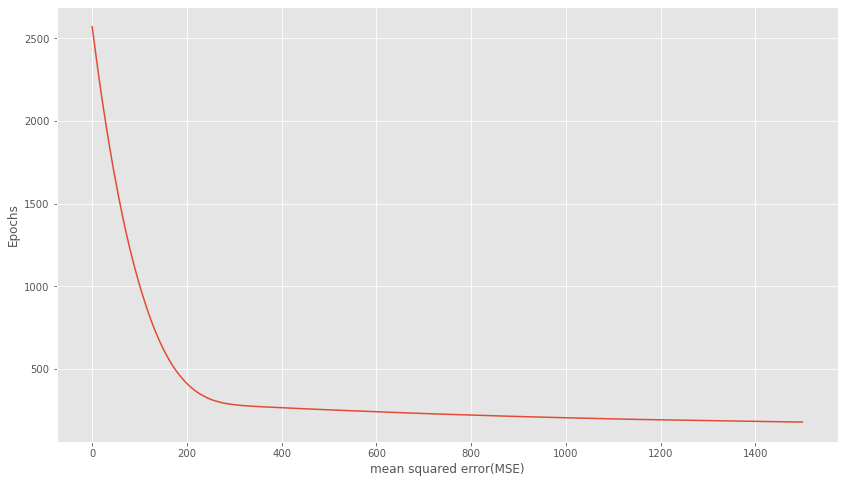

In [8]:
#plotting our MSE loss value over the runtime of our NN.
plt.plot(history.history['loss'])
plt.xlabel('mean squared error(MSE)')
plt.ylabel('Epochs')

In [9]:
print("\nFinal Mean Squared Error (MSE) value: %5.3f" % model.evaluate(x,y))

16/16 [==============================] - 0s 1ms/step - loss: 180.7416

Final Mean Squared Error (MSE) value: 180.742


Below we can see our linear regression line overlaid on our dataset. While not a terrible choice of fit the data does diverge heavily from our line at certain points. Let's see if we can get some predictions in any of these areas. 

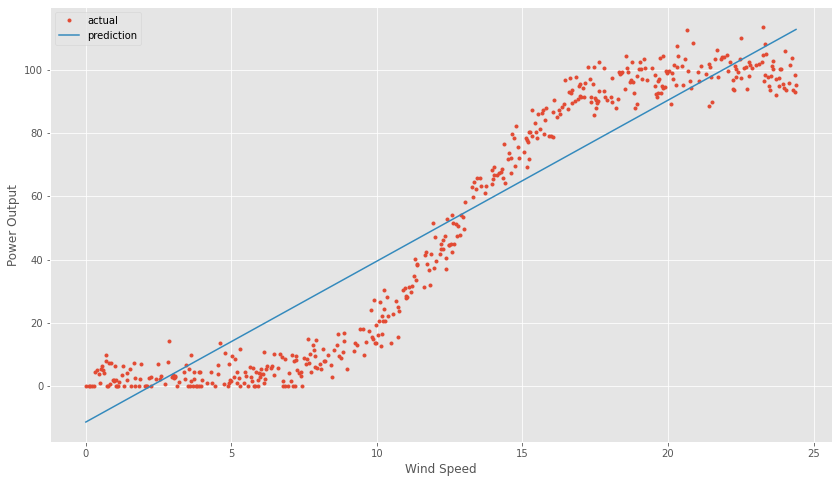

In [10]:
plt.plot(x, y, '.',label='actual' )
plt.plot(x, model.predict(x), label='prediction')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

At the 10th row of the dataframe, we see the speed is 0.55km/h and our power output is 6.49Kw/h.

In [11]:
df.loc[10]

speed    0.551
power    6.498
Name: 10, dtype: float64

When passed into our model at the same speed we get a prediction of -8.53KW/h

In [12]:
model.predict([0.551])

array([[-8.5376005]], dtype=float32)

Similarly, when the speed is 9.20km/h we can expect a power output of 11.12KW/h.

In [13]:
df.loc[180]

speed     9.209
power    11.120
Name: 180, dtype: float64

But when we pass this wind speed value into our model we get a value of 35.47KW/h.

In [14]:
model.predict([9.209])

array([[35.473236]], dtype=float32)

In [15]:
print("Here are the coefficients of our model: m =%5.2f and c = %5.2f:" % (model.get_weights()[0][0][0], model.get_weights()[1][0]))

Here are the coefficients of our model: m = 5.08 and c = -11.34:


<br>

#### Polynomial regression model

For our next model we will perform nonlinear regression as our dataset appears curvilinear. Our model will still be sequential but this time we will have a hidden layer consisting of 30 neurons each using the sigmoid activation function. Sigmoid activation was chosen as our data appears to follow a logistic growth curve which is the characteristic S shape trend that can be observed in the data[6](https://en.wikipedia.org/wiki/Sigmoid_function),[7](https://en.wikipedia.org/wiki/Logistic_function). The sigmoid/logistic function is computed as follows: 

$$f(x)={\frac {1}{1+e^{-x}}}$$

As the sigmoid function can only provide us with values between 0 and 1 for each neuron, we must add an additional Dense layer with a linear activation function. This is the output layer that scales our regression model to our dataset. It returns only a single value, our predicted *y* value. Our *weight* and *bias* are left as the default on both these layers. We compile this model in a largely similar manner, using the same *mean squared error* calculation. The only difference being that we specify a slower learning rate to Adam to help increase the accuracy of our fit. 

Finally, we fit the data over 300 epochs, using a batch_size of 5. Specifying a batch size can help to increase our accuracy further.

(Note: I chose to use 30 neurons for my hidden layer, which proved to be more than enough when fitting the model on the dataset.)

In [16]:
# # Create our neural network with the sequential class. Code adapted from [8].
model = kr.models.Sequential()
#Add Dense layer with 50 neurons, sigmoidal activation.
model.add(kr.layers.Dense(30, input_shape=(1,), activation='sigmoid'))
#Linear activation output layer to fit model to dataset.
model.add(kr.layers.Dense(1, activation='linear'))
#Compile with MSE + low learning rate.
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [17]:
# Fit the data.
history = model.fit(x, y, epochs=300, batch_size=5)

Epoch 1/300
98/98 [==============================] - 0s 337us/step - loss: 4101.6597
Epoch 2/300
98/98 [==============================] - 0s 617us/step - loss: 4330.3065
Epoch 3/300
98/98 [==============================] - 0s 371us/step - loss: 3782.4242
Epoch 4/300
98/98 [==============================] - 0s 508us/step - loss: 3259.5969
Epoch 5/300
98/98 [==============================] - 0s 416us/step - loss: 3119.9337
Epoch 6/300
98/98 [==============================] - 0s 507us/step - loss: 2737.7394
Epoch 7/300
98/98 [==============================] - 0s 506us/step - loss: 2516.1415
Epoch 8/300
98/98 [==============================] - 0s 495us/step - loss: 2231.9681
Epoch 9/300
98/98 [==============================] - 0s 503us/step - loss: 2220.4923
Epoch 10/300
98/98 [==============================] - 0s 331us/step - loss: 2181.2486
Epoch 11/300
98/98 [==============================] - 0s 616us/step - loss: 1964.0071
Epoch 12/300
98/98 [==============================] - 0s 310us/

98/98 [==============================] - 0s 416us/step - loss: 46.9434
Epoch 98/300
98/98 [==============================] - 0s 501us/step - loss: 47.7123
Epoch 99/300
98/98 [==============================] - 0s 536us/step - loss: 49.3676
Epoch 100/300
98/98 [==============================] - 0s 619us/step - loss: 49.2640
Epoch 101/300
98/98 [==============================] - 0s 680us/step - loss: 43.7147
Epoch 102/300
98/98 [==============================] - 0s 649us/step - loss: 48.0209
Epoch 103/300
98/98 [==============================] - 0s 598us/step - loss: 49.4698
Epoch 104/300
98/98 [==============================] - 0s 557us/step - loss: 49.3553
Epoch 105/300
98/98 [==============================] - 0s 722us/step - loss: 43.1087
Epoch 106/300
98/98 [==============================] - 0s 454us/step - loss: 46.6294
Epoch 107/300
98/98 [==============================] - 0s 433us/step - loss: 45.6167
Epoch 108/300
98/98 [==============================] - 0s 433us/step - loss: 43.4

98/98 [==============================] - 0s 515us/step - loss: 23.3764
Epoch 194/300
98/98 [==============================] - 0s 515us/step - loss: 21.6550
Epoch 195/300
98/98 [==============================] - 0s 505us/step - loss: 21.4662
Epoch 196/300
98/98 [==============================] - 0s 351us/step - loss: 20.3461
Epoch 197/300
98/98 [==============================] - 0s 432us/step - loss: 21.7861
Epoch 198/300
98/98 [==============================] - 0s 550us/step - loss: 22.0591
Epoch 199/300
98/98 [==============================] - 0s 289us/step - loss: 20.7117
Epoch 200/300
98/98 [==============================] - 0s 493us/step - loss: 21.4753
Epoch 201/300
98/98 [==============================] - 0s 439us/step - loss: 18.7736
Epoch 202/300
98/98 [==============================] - 0s 432us/step - loss: 20.5143
Epoch 203/300
98/98 [==============================] - 0s 546us/step - loss: 20.8235
Epoch 204/300
98/98 [==============================] - 0s 279us/step - loss: 21

98/98 [==============================] - 0s 495us/step - loss: 16.5160
Epoch 290/300
98/98 [==============================] - 0s 557us/step - loss: 18.7270
Epoch 291/300
98/98 [==============================] - 0s 526us/step - loss: 19.3000
Epoch 292/300
98/98 [==============================] - 0s 515us/step - loss: 17.0206
Epoch 293/300
98/98 [==============================] - 0s 320us/step - loss: 17.0056
Epoch 294/300
98/98 [==============================] - 0s 442us/step - loss: 16.0438
Epoch 295/300
98/98 [==============================] - 0s 490us/step - loss: 18.1473
Epoch 296/300
98/98 [==============================] - 0s 431us/step - loss: 17.3783
Epoch 297/300
98/98 [==============================] - 0s 430us/step - loss: 16.8322
Epoch 298/300
98/98 [==============================] - 0s 498us/step - loss: 17.7458
Epoch 299/300
98/98 [==============================] - 0s 429us/step - loss: 17.7101
Epoch 300/300
98/98 [==============================] - 0s 568us/step - loss: 16

<br>

#### Analysis
Below we see our regression model on our dataset. From initial observations it looks like an excellent fit. 

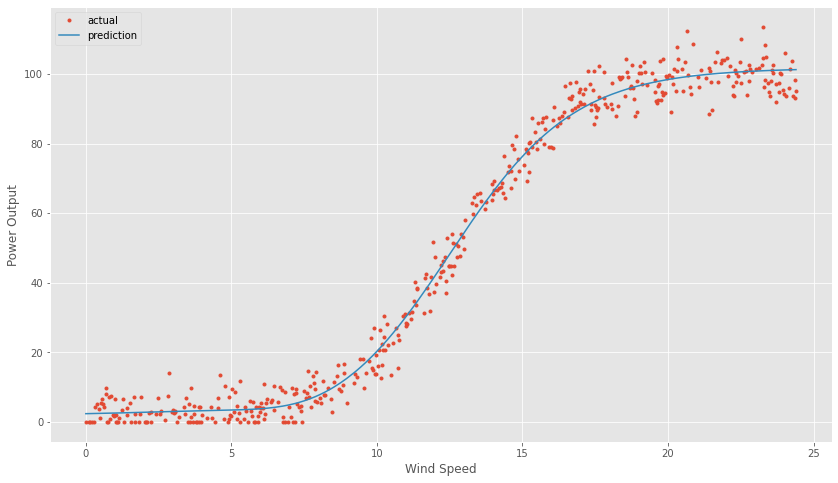

In [18]:
plt.plot(x,y,'.',label='actual' )
plt.plot(x, model.predict(x),label='prediction' )
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

Here is our plot of the MSE over the course of the curve fitting process, note that by the end of 300th epoch our loss value reaches to values as low as the high teens. 

Text(0, 0.5, 'Epochs')

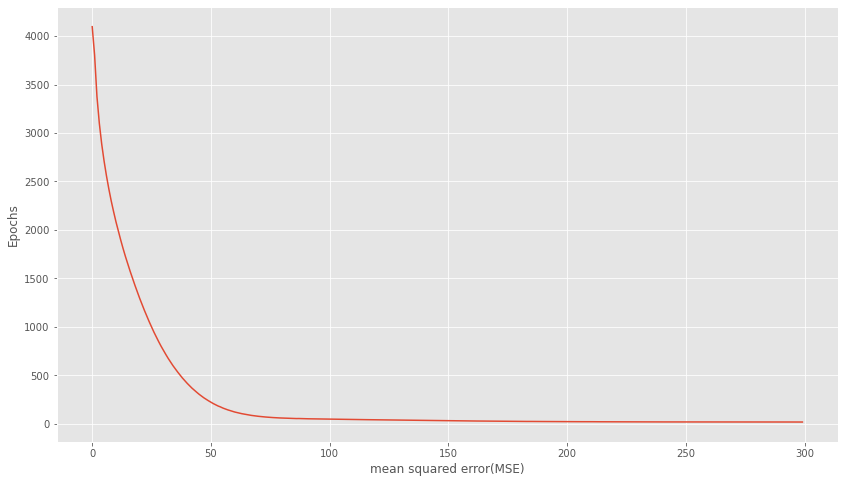

In [19]:
#plotting our MSE loss value over the runtime of our NN.
plt.plot(history.history['loss'])
plt.xlabel('mean squared error(MSE)')
plt.ylabel('Epochs')

In [20]:
print("\nFinal Mean Squared Error (MSE) value: %5.3f" % model.evaluate(x,y))

16/16 [==============================] - 0s 684us/step - loss: 17.2101

Final Mean Squared Error (MSE) value: 17.210


Finally, let's look at some predictions that we get as *power* values when we give the model different wind speeds. Below are three randomly selected rows from our dataframe, the speed values from these rows are passed into our model. As we can see in all three of the examples our prediction values are highly accurate being only a Kilowatt away at max. 

In [21]:
[df.loc[5],"",df.loc[230],"",df.loc[450]]

[speed    0.325
 power    4.331
 Name: 5, dtype: float64,
 '',
 speed    11.737
 power    38.552
 Name: 230, dtype: float64,
 '',
 speed     22.673
 power    100.698
 Name: 450, dtype: float64]

In [22]:
print("Predicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[5][0], model.predict([df.loc[5][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[5][1])
print("\nPredicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[230][0], model.predict([df.loc[230][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[230][1])
print("\nPredicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[450][0], model.predict([df.loc[450][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[450][1])

Predicted power when speed is 0.325km/h: 2.454KW/h
ACTUAL: 4.331KW/h

Predicted power when speed is 11.737km/h: 38.801KW/h
ACTUAL: 38.552KW/h

Predicted power when speed is 22.673km/h: 100.669KW/h
ACTUAL: 100.698KW/h


<br>

#### Summary

While our linear model achieved the close to the best fit it could, it proved to be unsuitable in its prediction accuracy. The polynomial model on the other hand appears much more reliable at accurately predicting power regardless of windspeed. While both models will be utilized in the powerprod web service, our polynomial model is the clear winner in terms of returning accurate values. 

***
# Sources

[1] Keras library, https://keras.io/

[2] Keras, Keras Documentation, The Sequential class https://keras.io/api/models/sequential/

[3] tutorialspoint, Keras - Dense Layer, https://www.tutorialspoint.com/keras/keras_dense_layer.htm

[4] Wikipedia, Mean squared error, https://en.wikipedia.org/wiki/Mean_squared_error

[5] freeCodeCamp, Machine learning: an introduction to mean squared error and regression lines, Moshe Binieli, https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

[6] Wikipedia, Sigmoid Function, https://en.wikipedia.org/wiki/Sigmoid_function

[7] Wikipedia, Logistic Function, https://en.wikipedia.org/wiki/Logistic_function

[8] GitHub, Linear regression in keras, Ian McLoughlin, https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb


***
# End